# Curso de Optimización I (DEMAT/CIMAT)
# Tarea 2

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Febrero 10, 2025**    |
| Fecha límite de entrega de la tarea: | **Febrero 16, 2025**    |



## Indicaciones

Escriba el código de los algoritmos que se piden en una celda de este notebook. Lo importante es
que en el notebook aparezcan los resultados de la pruebas realizadas y que:
- Si se requieren otros archivos para poder reproducir los resultados, para mandar la tarea cree 
  un archivo ZIP en el que incluya el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los resultados están en el notebook,
  no hace falta comprimir el notebook y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del Classroom como un archivo
  independiente. No incluya el PDF dentro del ZIP, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables para el algoritmo, pero sólo es para
facilitar la descripción. En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las funciones. La intención es que tomen en cuenta
lo que requiere el algoritmo y que tiene que haber parámetros que permitan controlar el compor-
tamiento del algoritmo, evitando que dejen fijo un valor y que no se puede modificar para hacer
diferentes pruebas. Si quieren dar esta información usando un tipo de dato que contenga todos los
valores o usar variables por separado, etc., lo pueden hacer y no usen variables globales si no es
necesario.

Lo mismo aplica para los valores que devuelve una función. Pueden codificar la salida de las
funciones de la manera que prefieran. El punto es que podamos tener acceso a los resultados para
poder usarlos, y por eso no es conveniente que la función sólo imprima los valores sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o si escribio la solución en una
hoja, puede insertar la(s) foto(s) en la que se vea clara la solución. Si le es más facíl insertar la
imagen en un procesador de texto como Word, lo puede utilizar y exportar el documento a PDF y
subir el archivo Classroom sin comprimir para poder escribir anotaciones en el PDF.

---

### Resuelta por Cesar Amilkar Rivera Covarrubias

## Ejercicio 1 (2 puntos)

Programar la función cuadrática

$$ q(\mathbf{x};\, \mathbf{A}, \mathbf{b}) =  \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}.  $$

1. Escriba una función que reciba como parámetro el nombre de un archivo `npz`, lea el archivo y
   cree la matriz $\mathbf{A}$ y el vector $\mathbf{b}$ del archivo `npz`, y calcule el minimizador 
   $\mathbf{x}_{\ast}$ de $q(\mathbf{x};\, \mathbf{A}, \mathbf{b})$ resolviendo
   el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{\ast} = \mathbf{b}$. Use la factorización de Cholesky para resolver el sistema
   de ecuaciones y de esta manera saber si la matriz es definida positiva, y en este caso devolver
   $\mathbf{A}$,  $\mathbf{b}$ y $\mathbf{x}_{\ast}$. En caso contrario devolver $\mathbf{A}$,  $\mathbf{b}$ y `None`.
2. Escriba el código de la función $q(\mathbf{x};\, \mathbf{A}, \mathbf{b})$.  
   Recibe como parámetros la variable $\mathbf{x}$, la matriz $\mathbf{A}$  y el vector $\mathbf{b}$.
   Devuelve el valor de la función cuadrática en el punto  $\mathbf{x}$.
3. Escriba la función `vec2str(x)` que recibe un arreglo `x` y devuelve una cadena que tiene los elementos del arreglo `x`
   si el arreglo tiene dimensión a lo más 6, o los primeros 3 elementos y los 3 últimos elementos de `x`
   si el arreglo tiene dimensión mayor a 6.
4. Pruebe las funciones anteriores usando cada uno de los 5 archivos `npz` se encuentran en el 
   archivo ZIP `datosTarea02.zip`. Para cada archivo, use la función del punto anterior para
   obtener $\mathbf{A}$,  $\mathbf{b}$ y $\mathbf{x}_{\ast}$; defina $n$ como la longitud del tamaño 
   del vector $\mathbf{b}$, defina $\mathbf{x}_0 = (-5, 0, ..., 0)^\top \in \mathbb{R}^n$ e imprima

- el valor de $n$,
- $vec2str(\mathbf{x}_0)$, 
- $q(\mathbf{x}_0,\; \mathbf{A}, \mathbf{b})$, 

y  si $\mathbf{x}_{\ast}$ fue calculado imprimir también  
- $vec2str(\mathbf{x}_{\ast})$, y
- $q(\mathbf{x}_{\ast};\, \mathbf{A}, \mathbf{b})$.

Debería observar que 
$q(\mathbf{x}_0;\, \mathbf{A}, \mathbf{b}) \geq q(\mathbf{x}_{\ast};\, \mathbf{A}, \mathbf{b})$.

**Nota:** Cada archivo `npz` en el ZIP tiene dos arreglos que corresponden a la matriz $\mathbf{A}$ y
el vector  $\mathbf{b}$. Para leer los datos puede hacer, por ejemplo:

```
npzfile = np.load("datosTarea02/matA_vecb1.npz")
A = npzfile['arr_0']
b = npzfile['arr_1']
```

### Solución:

In [18]:
import numpy as np 
import scipy as sp 

#Funciones del punto 1
#Funcion axuliar que carga los datos y crea la matriz A y el vector b
def load_data (path): 
    data = np.load(path) 
    A = data['arr_0']
    b = data['arr_1'] 
    return A, b 

def minimizador (path): 
    A, b = load_data(path) #Recuperamos los datos de la ruta con la funcion auxiliar 
    c, low = np.linalg.cholesky(A), True 
    x = np.linalg.solve(A, b)
    if np.allclose(A @ x - b, np.zeros(len(b))):  
        return A, b, x 
    else: 
        return A, b, None 

#Funciones del punto 2 
def fun_q(x, A, b): 
    x = np.asarray(x)
    A = np.asarray(A) 
    b = np.asarray(b) 

    return 0.5 * (x.T @ A @ x) - b.T @ x 

#Funcion del punto 3 
def vec2str(x): 
    c = ''

    if len(x) <= 6: 
        for val in x: 
            c += str(val) 
            #En caso de espacio 
            c+= ' '
    else: 
        for i in range(3): 
            c += str(x[i]) 
            c+= ' '

        for i in range(1, 4): 
            c += str(x[-i]) 
            c+= ' '


    return c   


### Pruebas de las funciones 

In [19]:
import numpy as np 
from tabulate import tabulate 
#Parte 1 
for i in range(1, 6): 
    path = f'datosTarea02/matA_vecb{i}.npz'

    A, b, x = minimizador(path) 
    n = len(b) 
    x0 = np.arange(n)
    x0[0] = -5 
    for j in range(1, n): 
        x0[j] = 0
    
    print(f"Resultados de los datos del archivo {path}")
    print("n: ", n) 
    print("vec2str(x0): ", vec2str(x0)) 
    res_fun_x0 = fun_q(x0, A, b)
    print("q(x0, A, b): ", res_fun_x0) 
    
    if x is not None: 
        print("vec2str(x*): ", vec2str(x)) 
        res_fun_x = fun_q(x, A, b)
        print("q(x*, A, b): ", res_fun_x) 
        print("q(x0, A, b) >= q(x*, A, b): ", res_fun_x0 >= res_fun_x )
        print('------------------------------------------------')
        #print(f"A: \n {tabulate(A)}, \nb: \n {tabulate([b])}, \nx: {x}") 


Resultados de los datos del archivo datosTarea02/matA_vecb1.npz
n:  2
vec2str(x0):  -5 0 
q(x0, A, b):  924.9999999999997
vec2str(x*):  3.9999999999999996 -1.5000000000000009 
q(x*, A, b):  -318.1249999999999
q(x0, A, b) >= q(x*, A, b):  True
------------------------------------------------
Resultados de los datos del archivo datosTarea02/matA_vecb2.npz
n:  2
vec2str(x0):  -5 0 
q(x0, A, b):  756.25
vec2str(x*):  -4.999999999999991 -8.99999999999999 
q(x*, A, b):  -114.5
q(x0, A, b) >= q(x*, A, b):  True
------------------------------------------------
Resultados de los datos del archivo datosTarea02/matA_vecb3.npz
n:  10
vec2str(x0):  -5 0 0 0 0 0 
q(x0, A, b):  69.125
vec2str(x*):  1.0 0.9999999999999997 0.9999999999999996 0.9999999999999997 0.9999999999999998 0.9999999999999998 
q(x*, A, b):  -7.139999999999997
q(x0, A, b) >= q(x*, A, b):  True
------------------------------------------------
Resultados de los datos del archivo datosTarea02/matA_vecb4.npz
n:  100
vec2str(x0):  -5 0 


_

```







```

---

## Ejercicio 2 (3 puntos)

Programar el Algoritmo 1 de la Clase 6 del método de descenso máximo para optimizar funciones cuadráticas de la forma
$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}.  $$  


1. La función que implementa el algoritmo recibe como argumentos:
- la matriz $\mathbf{A}$ (que se supone que es simétrica y definida positiva), 
- el vector $\mathbf{b}$ de la función cuadrática,
- un punto inicial $\mathbf{x}_{0}$ 
- una tolerancia $\tau$ y 
- el número máximo de iteraciones $N$.

La función debe devolver:
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora `bres` que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\mathbf{g}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.

2. Programe la función que evalúa la función $f(\mathbf{x})$. 
   La función recibe como argumentos la matriz $\mathbf{A}$ y el vector $\mathbf{b}$,
   y devuelve el valor $\frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}$.
   

3. Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos
   `npz` que están contenidos en el archivo `datosTarea02.zip`:

Para cada archivo `npz` haga lo siguiente:
- Use la función del Punto 1 del Ejercicio 1 para obtener $\mathbf{A}$, $\mathbf{b}$
  y $\mathbf{x}_*$. Si $\mathbf{x}_*$ no es `None` continúe y 
  defina la variable $n$ como el tamaño del vector $\mathbf{b}$.  
- Haga $\mathbf{x}_{0} = (-5, 0, ..., 0)^\top \in \mathbb{R}^n$ y el número de iteraciones máximas $N=1000$.
- Defina la tolerancia $\tau = \sqrt{n*\epsilon_m}$, donde $\epsilon_m$ es el épsilon de la máquina.
- Calcule el punto $\mathbf{x}_{k}$ con el algoritmo.  
- Imprima los valores 
 
$$n, \; vec2str(\mathbf{x}_0), \; f(\mathbf{x}_0),\; k,\;vec2str(\mathbf{x}_k), \;f(\mathbf{x}_k),\; bres,\; \|\mathbf{x}_{k}-\mathbf{x}_{*}\| $$



### Solución:

In [20]:
import numpy as np 

#Algoritmo de descenso de gradiente para funciones cuadraticas. 
def descenso_max_grad_funciones_cuadradas (A, b, x0, tau, N):
    if tau < 0: 
        raise Exception('La tolerancia debe ser no negativa') 
    A = np.asarray(A) 
    b = np.asarray(b) 
    xk = np.asarray(x0)

    for i in range(N+1): 
        #Calculamos el gradiente
        gk = (A @ xk) - b  
        gk = np.array(gk)

        #Comprobamos la condicion de paro 
        if np.linalg.norm(gk, ord=2) < tau: 
            return xk, i, True

        #Obtenemos los valores de alpha_k y x_k 
        alpha_k = (gk.T @ gk) / (gk.T @ A @ gk) 
        
        xk = xk - alpha_k * gk
    return xk, i, False



#Funcion que evalua la funcion f(x) 
def fun_f(A, b, x):
    A = np.asarray(A) 
    b = np.asarray(b) 
    x = np.asarray(x) 

    return 0.5 * x.T @ A @ x - b.T @ x 

    



In [21]:
import numpy as np 

eps = np.finfo(np.float64).eps 

for i in range(1, 6): 
    #Archivo que recupera los vectores A y b
    path = f'datosTarea02/matA_vecb{i}.npz'

    #Procesamiento y definicion de variables 
    A, b, x = minimizador(path) 
    if x is None: 
        continue 

    n = len(b) 
    x0 = np.arange(n)
    x0[0] = -5 
    for j in range(1, n): 
        x0[j] = 0
    N = 1000
    tol = np.sqrt(n *eps) 

    #Recuperacion de resultados de la funcion de gradiente
    xk, k, bres = descenso_max_grad_funciones_cuadradas(A, b, x0, tol, N) 

    print("n:", n)
    print("vec2str(x0): ", vec2str(x0))
    print("f(x0): ", fun_f(x = x0, A = A, b = b )) 
    print("xk", xk)
    print("k: ", k) 
    print("vec2str(xk): ", vec2str(xk)) 
    print("f(xk): ", fun_f(x = xk, A = A, b = b)) 
    print("flag: ", bres) 
    print("||xk - x*||: ", np.linalg.norm(xk - x, ord=2))
    print("||f(xk) - f(x*)||: ", np.linalg.norm((fun_f(x = xk, A = A, b = b) - fun_f(x = x, A = A, b = b))))
    print("-----------------------------------------")

    
    

n: 2
vec2str(x0):  -5 0 
f(x0):  924.9999999999997
xk [ 4.  -1.5]
k:  17
vec2str(xk):  3.999999999327667 -1.5000000007351675 
f(xk):  -318.1249999999998
flag:  True
||xk - x*||:  9.96243340508571e-10
||f(xk) - f(x*)||:  1.1368683772161603e-13
-----------------------------------------
n: 2
vec2str(x0):  -5 0 
f(x0):  756.25
xk [-5. -9.]
k:  9
vec2str(xk):  -4.999999997515754 -8.999999997086766 
f(xk):  -114.50000000000003
flag:  True
||xk - x*||:  3.828616378292547e-09
||f(xk) - f(x*)||:  2.842170943040401e-14
-----------------------------------------
n: 10
vec2str(x0):  -5 0 0 0 0 0 
f(x0):  69.125
xk [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]
k:  65
vec2str(xk):  0.9999999927471493 0.9999999922329514 0.9999999935309564 0.9999999936838496 0.9999999949471328 0.9999999920930701 
f(xk):  -7.139999999999997
flag:  True
||xk - x*||:  2.256647426756109e-08
||f(xk) - f(x*)||:  0.0
-----------------------------------------
n

_

```







```

---

## Ejercicio 3 (5 puntos)

Programe el Algoritmo 1 de la Clase 5  de descenso máximo, usando el método de la 
sección dorada para obtener $\alpha_k \in [0,1]$:

$$ \alpha_k  = \arg \; \min_{\alpha\in[0,1]} \; f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})).$$

1. La función que implementa el algoritmo recibe como entrada:
- La función $f(\mathbf{x})$, 
- el gradiente $\nabla f(\mathbf{x})$ de la función $f$, 
- un punto inicial $\mathbf{x}_{0}$, 
- las tolerancias $\tau_1>0\;$  y $\;\tau_2>0$, 
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, y
- el número máximo de iteraciones $N_{gs}$ para el método de la sección dorada.

La función devuelve 
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\mathbf{g}_{k}\| < \tau_1$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.
- Un arreglo que contiene la secuencia de puntos $\mathbf{x}_{0}, \mathbf{x}_{1}, ...
  \mathbf{x}_{k}$ si la dimensión de la variable es $n=2$, y es vacío en otro
  caso. Es decir, sólo cuando la dimensión de la variable $\mathbf{x}$ es 2 
  guardamos la secuencia de puntos.
  
Dentro de esta función se puede definir $\phi(\alpha)=f(\mathbf{x}_{k} - \alpha \mathbf{g}_{k})$
y usar el algoritmo de la sección dorada de la Tarea 1 para calcular su minimizador $\alpha_k$
en el intervalo $[0, 1]$. Para hacer esto, puede usar una función `lambda` como en el ejemplo 
en las notas de la **Ayudantía 1**. Use la tolerancia $\tau_2$ para el algoritmo de la
sección dorada. 


2. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente 
   de manera analítica y programe la función correspondiente. Use cada punto 
   $\mathbf{x}_0$ como punto inicial del algoritmo. Si $n=2$, agregue la gráfica 
   de los contornos de nivel de la función objetivo.
   Para esto, puede usar como referencia la función `plot2DFnc()` que se define en la 
   siguiente celda, use los rangos de las variables indicado y agrege a los parámetros
   de la función la lista de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$ 
   generados por el algoritmo para observar su comportamiento.


**Función cuadrática 1:** La función cuadrática definida por la matriz $\mathbf{A}$ 
y el vector $\mathbf{b}$ que están en el archivo `matA_vecb1.npz`. 
$$ \mathbf{x}_0 = (-5., 0.) $$
$$ xleft=-10, \; xright=10, \; ybottom=-10, \; ytop=10$$


**Función cuadrática 2:** La función cuadrática definida por la matriz $\mathbf{A}$ 
y el vector $\mathbf{b}$ que están en el archivo `matA_vecb5.npz`. 
$$ \mathbf{x}_0 = (-5., 0, ..., 0) $$


**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$
$$ xleft=-5.5,\; xright=5.5,\; ybottom=-5.5,\; ytop=5.5$$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$xleft=-4.5, \; xright=4.5, \; ybottom=-4.5,\; ytop=4.5$$

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
$$ \mathbf{x}_0 = (-2.1, 4.5).\;  xleft=-5., xright=5., ybottom=-5., ytop=5.$$
$$ \mathbf{x}_0 = (-1.2, 1.0).\;  xleft=-5., xright=5., ybottom=-5., ytop=5.$$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

En la página [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)
pueden ver las gráficas de estas funciones y sus mínimos locales.

Use las  tolerancias $\tau_1 = \sqrt{n}\epsilon_m^{1/3}, \tau_2 = \epsilon_m^{1/2}$,
donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas
$N=10000$ para el descenso máximo y $N_{gs}=200$ para el método de la sección dorada.


3. Repita la prueba para función de Rosenbrock usando el punto inicial $\mathbf{x}_0 = (-2.1, 4.5)$
   usando $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$ para relajar las condiciones de
   paro del método de la sección dorada y ver si podemos terminar más rápido.
   Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo. 

### Solución:

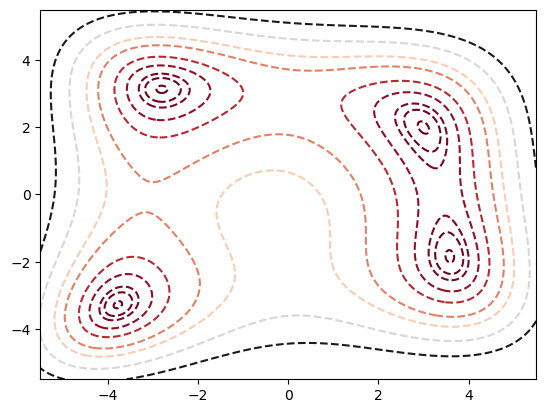

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def fncHimmelblau(x, fparam=None):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2;



def plot2DFnc(fncf, xleft, xright, ybottom, ytop, levels=None):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 250)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    vz = np.zeros( len(ax)*len(ay) )
    for i,xy in enumerate(zip(mX.flatten(), mY.flatten())):
        vz[i] = fncf(xy)
    mZ = vz.reshape( len(ay), len(ax) ) 
    if levels is None:
        fig = plt.figure(figsize=(6,4))
        im = plt.imshow(mZ, cmap='coolwarm', extent=(xleft, xright, ybottom, ytop), 
                        interpolation='bilinear', origin='lower') 
        plt.colorbar(im)
    else:
        fig, ax = plt.subplots()
        CS = ax.contour(mX, mY, mZ, levels, cmap='RdGy', linestyles='dashed')


    
plot2DFnc(fncHimmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
          levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

_

```







```

---

In [23]:
import numpy as np 
from funciones_prop import * 
import matplotlib.pyplot as plt

eps = np.finfo(np.float64).eps


def descenso_max(fun, fun_grad, x0, tol1 = None, tol2 = None, N= None, Ng = None, args_sec_dor = None): 
    '''
    Entradas 
        fun: Funcion objetivo 
        fun_grad: Gradiente de la funcion objetivo como funcion 
        x0: punto inicial 
        tol1: toleracia 1 
        tol2: tolerancia 2 
        N: Iteraciones maximas para el algoritmo de descenso 
        Ng: Maximo de iteraciones para el metodo de la seccion dorada
        args_sec_dor: Tupla que tiene los argumentos de la seccion dorada

    Salidas: 
        xk: Candidato a minimizador 
        i: Iteraciones completadas 
        bool: Valor que representa si la condicion de paro se cumplio antes de la cantidad maxima de operaciones N 
        pts_sec: Sucesion de puntos que es requerida si dim(x0) = 2. 
    '''

    n = len(x0)

    if N == None: 
        N = 10000
    
    if Ng == None: 
        Ng = 200 

    if tol1 == None:
        tol1 = n**(1/2) * eps**(1/3) 
    
    if tol2 == None: 
        tol2 = eps**(1/2) 
    
    if args_sec_dor == None: 
        args_sec_dor = [0, 1]


    xk = np.asarray(x0)
    
    if len(x0) == 2: 
        flag = True
        pts_seq = [xk]
    else: 
        flag = False 
        pts_seq = []

    for i in range(N): 
        gk = fun_grad(xk)

        if np.linalg.norm(gk) < tol1: 
            return xk, i, True, pts_seq 

        fun_lam = lambda alpha: fun(xk - alpha * gk)
        
        res_seccion_dorada = met_seccion_dorada(
                    fun_lam, 
                    args_sec_dor[0], 
                    args_sec_dor[1], 
                    tol2,   
                    Ng) 
 


        
        alpha_k = res_seccion_dorada[0] 

        pk = -gk 

        xk = np.asarray(xk + alpha_k * pk)

        if flag:
            pts_seq.append(xk.flatten())

    return xk, i, False, pts_seq 



### Prueba de las funciones

In [24]:
import numpy as np 

eps = np.finfo(np.float32).eps  
N = 10000 
Ng = 200 


xk: [ 3.99981543 -1.50021195]
k:  9
flag:  True


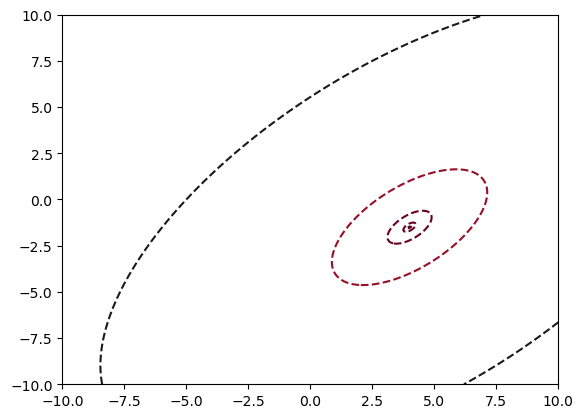

In [25]:


x0 = [-5.0, 0.0]
n = len(x0)
tol1 = n**(1/2) * eps**(1/3) 
tol2 = n**(1/2) * eps**(1/2) 

def fun_uno (x): 
    A, b = load_data('datosTarea02\\matA_vecb1.npz')
    x = np.asarray(x)
    return (0.5)*(x.T @ A @ x) - b.T @ x 

def grad_fun_uno(x):
    A, b = load_data('datosTarea02\\matA_vecb1.npz')
    x = np.asarray(x)
    return A@x - b 

xl = -10 
xr = 10
ybottom = - 10 
ytop = 10 

xk_gr, k, flag, sec = descenso_max(fun_uno, grad_fun_uno, x0)
print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   

#obtenemos el valor de la funcion para cada valor en la sucesion de puntos 
contornos = [fun_uno(x)  for x in sec]

#Pasamos los parametros definidos por el problema y el arreglo ordenado de mayor a menor
plot2DFnc(fun_uno, xl, xr, ybottom, ytop, contornos[::-1])





In [26]:
x0 = (-5.0, 0.0) 
n = len(x0)
_, b =  load_data('datosTarea02\\matA_vecb5.npz')

n = len(b) 
x0 = [0 for i in range(n)]
x0[0] = -5 

def fun_dos (x): 
    A, b = load_data('datosTarea02\\matA_vecb5.npz')
    return (0.5)*(x.T @ A @ x) - b.T @ x 

def grad_fun_dos(x):
    A, b = load_data('datosTarea02\\matA_vecb5.npz')
    return A@x - b 

xl = -10 
xr = 10
ybottom = - 10 
ytop = 10 

xk_gr, k, flag, sec = descenso_max(fun_dos, grad_fun_dos, x0)
# print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   



k:  10
flag:  True


x0:  [2.0, 4.0]
xk:  [ 3.58442411 -1.84797601]
k:  10
flag:  True
x0:  [0.0, 0.0]
xk:  [2.99990297 2.00017875]
k:  7
flag:  True


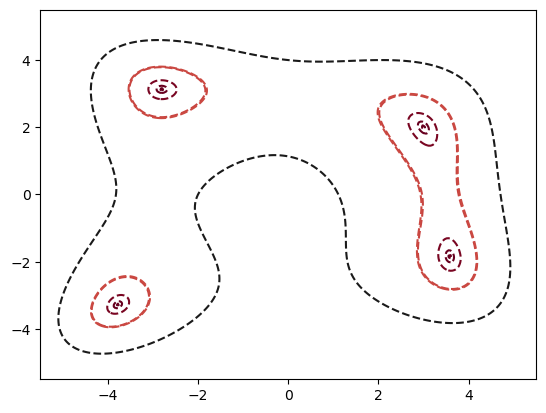

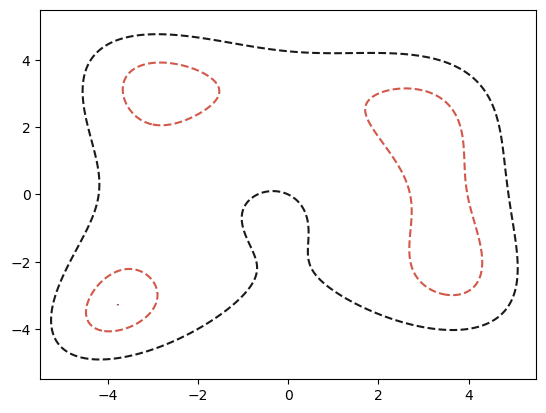

In [27]:
def fun_Himmenlblau(x): 
    x1 = x[0] 
    x2 = x[1] 

    return (x1**2 + x2 - 11)**2 + (x1 + x2 **2 -7)**2 

def grad_Himmenlblau(x): 
    x1 = x[0]
    x2 = x[1]
    par1 = 2*(x1**2 + x2 - 11) * (2* x1)  + 2*(x1 + x2**2 - 7) 
    par2 = 2*(x1**2 + x2 - 11) + 2* (x1 + x2**2 - 7) * (2 * x2)
    return np.asarray([par1, par2])

xl = -5.5 
xr = 5.5 
ybottom = -5.5 
ytop = 5.5 

x0 = [2.0, 4.0]  

xk_gr, k, flag, sec = descenso_max(fun_Himmenlblau, grad_Himmenlblau, x0)

print("x0: ", x0)
print("xk: ", xk_gr) 
print("k: ", k)
print('flag: ', flag)

contornos = [fun_Himmenlblau(x) for x in sec]

contornos.sort()

plot2DFnc(fun_Himmenlblau, xl, xr, ybottom, ytop, contornos)



x0 = [0.0, 0.0]  

xk_gr, k, flag, sec = descenso_max(fun_Himmenlblau, grad_Himmenlblau, x0)

print("x0: ", x0)
print("xk: ", xk_gr) 
print("k: ", k)
print('flag: ', flag)

contornos = [fun_Himmenlblau(x) for x in sec]

contornos.sort()

plot2DFnc(fun_Himmenlblau, xl, xr, ybottom, ytop, contornos)




In [28]:
#Funcion de Beale  

def fun_Beale(x):
    x1 = x[0]
    x2 = x[1]
    
    p1 = (1.5 - x1 + x1 * x2 )**2
    p2 = (2.25 - x1 + x1 * (x2 **2)) **2
    p3 = (2.625 - x1 + x1 * (x2 **3)) **2

    return p1 + p2 + p3 

def grad_fun_Beale(x): 
    x1 = x[0] 
    x2 = x[1] 

    par_p1_x1 = (1.5 - x1 + x1 * x2 ) * 2. * (-1. + x2) 
    par_p2_x1 =  (2.25 - x1 + x1 * (x2 **2)) * 2. *  (-1. + x2 **2) 
    par_p3_x1 = (2.625 - x1 + x1 * (x2 **3)) * 2. * (-1. + x2 **3) 

    grad_x1 = par_p1_x1 + par_p2_x1 + par_p3_x1


    par_p1_x2 = (1.5 - x1 + x1 * x2 ) * 2. * (x1) 
    par_p2_x2 = (2.25 - x1 + x1 * (x2 **2)) * 2. *  (x1 * x2 * 2)   
    par_p3_x2 = (2.625 - x1 + x1 * (x2 **3)) * 2. * (x1 * x2**2 * 3)

    grad_x2 = par_p1_x2 + par_p2_x2 + par_p3_x2


    return np.asarray([grad_x1, grad_x2])


In [29]:
##Comprobacion en el calculo del gradiente

from autograd import elementwise_grad as egrad
import autograd.numpy as np_atu
import random
import numpy as np

gradBeale = egrad(fun_Beale) 
dmin = -10.0 
dmax = 10.0 
n = 2 
x = np_atu.random.uniform(low = dmin, high=dmax, size=(n,))
print('x: ', x) 
print('gmanual: ', grad_fun_Beale(x))
print('gauto: ', gradBeale(x))
print(np.isclose(grad_fun_Beale(x), gradBeale(x)))

x:  [-8.3928119   6.54418515]
gmanual:  [-1337290.60291489  5126380.66907367]
gauto:  [-1337290.60291489  5126380.66907367]
[ True  True]


x0:  [2.0, 3.0]
xk:  [2.98062367 0.49515216]
k:  61
flag:  True
x0:  [2.0, 4.0]
xk:  [3.01797154 0.50453828]
k:  1012
flag:  True


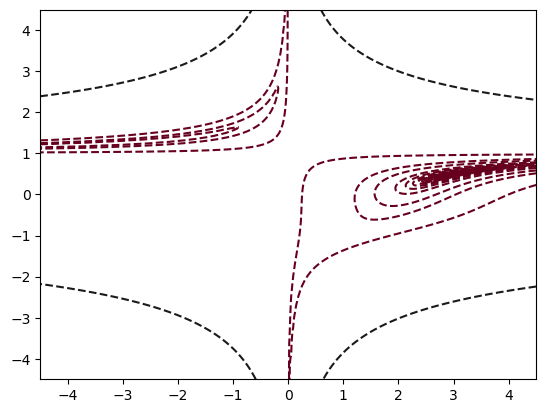

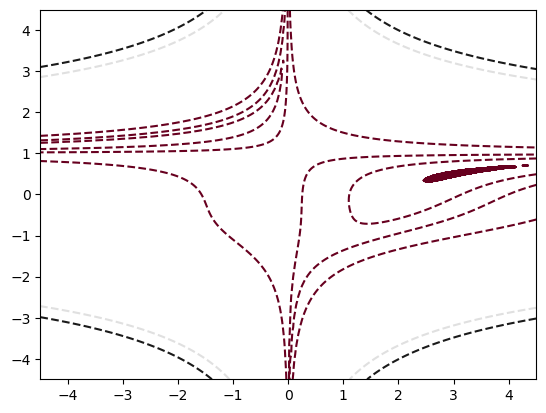

In [30]:

eps = np.finfo(np.float32).eps  

xl = -4.5
xr = 4.5 
ybottom = -4.5 
ytop = 4.5 

x0 = [2., 3.] 

xk_gr, k, flag, sec = descenso_max(fun_Beale, grad_fun_Beale, x0)

print("x0: ", x0)
print("xk: ", xk_gr) 
print("k: ", k)
print('flag: ', flag)

contornos = [fun_Beale(x) for x in sec]

contornos.sort()

plot2DFnc(fun_Beale, xl, xr, ybottom, ytop, contornos)
    
x0 = [2., 4.] 

xk_gr, k, flag, sec = descenso_max(fun_Beale, grad_fun_Beale, x0)

print("x0: ", x0)
print("xk: ", xk_gr) 
print("k: ", k)
print('flag: ', flag)

contornos = [fun_Beale(x) for x in sec]

contornos.sort()

plot2DFnc(fun_Beale, xl, xr, ybottom, ytop, contornos)

In [31]:
def fun_Rosenbrock (x): 
    n = len(x) 
    sum = 0.0 
    for i in range(n-1): 
        sum += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2 
    return sum 

def grad_fun_Rosenbrock(x): 
    n = len(x) 
    grad = np.array([0. for _ in range(n)])

    grad[0] = -400 *  x[0] * (x[1] - x[0]**2) + 2 * (x[0] - 1)
        
    for i in range(1, n-1): 
        grad[i] = -400 * x[i] * (x[i+1] - x[i]**2) + 2 * (x[i] - 1) + 200*(x[i+1] - x[i]*2)


    grad[-1] = 200 * (x[-1] - x[-2]**2)
    
    return np.asarray(grad)

In [32]:
#Comprobacion en el calculo del gradiente

from autograd import elementwise_grad as egrad
import autograd.numpy as np_atu
import random
import numpy as np

gradRosenbrock = egrad(fun_Rosenbrock) 
dmin = -10.0 
dmax = 10.0 
n = 2 
x = np_atu.random.uniform(low = dmin, high=dmax, size=(n,))
print('x: ', x) 
print('gmanual: ', grad_fun_Rosenbrock(x))
print('gauto: ', gradRosenbrock(x))
print(np.isclose(grad_fun_Rosenbrock(x), gradRosenbrock(x)))

x:  [3.1929604  6.68016353]
gmanual:  [4493.47441331 -702.96651567]
gauto:  [4493.47441331 -702.96651567]
[ True  True]


xk: [0.99996193 0.99992384]
k:  9999
flag:  False
xk: [1.0009253  1.00185354]
k:  9999
flag:  False


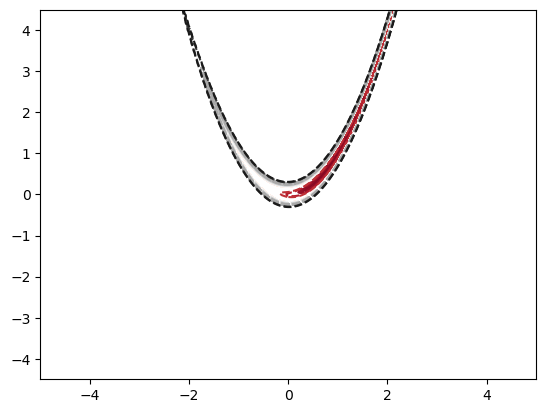

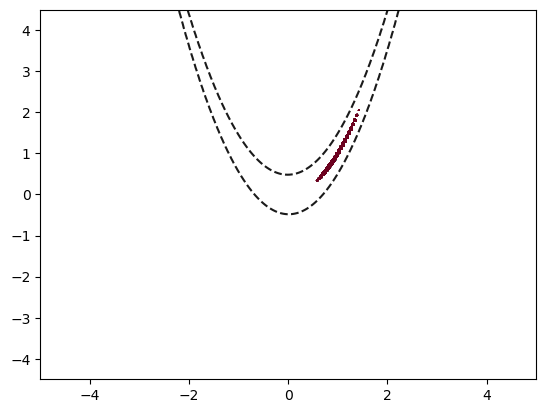

In [33]:
import numpy as np 

eps = np.finfo(np.float64).eps  

xl = -5. 
xr =  5. 
yb = -5. 
yt =  5.

x0 = [-2.1, 4.5] 

xk_gr, k, flag, sec = descenso_max(fun_Rosenbrock, grad_fun_Rosenbrock, x0)

print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   

#obtenemos el valor de la funcion para cada valor en la sucesion de puntos 
contornos = [fun_Rosenbrock(x)  for x in sec]

contornos.sort()

#Pasamos los parametros definidos por el problema y el arreglo ordenado de mayor a menor
plot2DFnc(fun_Rosenbrock, xl, xr, ybottom, ytop, contornos)


x0 = [-1.2, 1.0] 

xk_gr, k, flag, sec = descenso_max(fun_Rosenbrock, grad_fun_Rosenbrock, x0)

print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   

#obtenemos el valor de la funcion para cada valor en la sucesion de puntos 
contornos = [fun_Rosenbrock(x)  for x in sec]
contornos.sort()

#Pasamos los parametros definidos por el problema y el arreglo ordenado de mayor a menor
plot2DFnc(fun_Rosenbrock, xl, xr, ybottom, ytop, contornos)

In [34]:
x0 = [-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5] 

xk_gr, k, flag, sec = descenso_max(fun_Rosenbrock, grad_fun_Rosenbrock, x0)

print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   

x0 = [-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0]


xk_gr, k, flag, sec = descenso_max(fun_Rosenbrock, grad_fun_Rosenbrock, x0)

print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   


xk: [-0.84546142  0.76210025 -1.23662274  0.76210025 -1.23662274  0.76210025
 -1.23662274  0.69464484 -2.20177184  4.79966225]
k:  9999
flag:  False
xk: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]
k:  9999
flag:  False


### 2 

Para los ejercicios 1 y 2 calculamos el gradiente considerando la siguiente expresión 

$$f(x) = \frac{1}{2} x^T A X - b^T x  \Rightarrow \nabla f(x) = Ax - b.  $$

Por otro lado para los casos de las funciones 3 y 4 utilizamos la linealidad de la integral y la regla de la cadena. 

Himmelblau: 

\begin{align*}

\end{align*}

$$ 
\begin{align*}
\partial_{x1} f     
&= \partial_{x1} (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2  \\ 
&= 2(x_1^2 + x_2 - 11) *  2 (x1)  + 2(x_1 + x_2^2 - 7) 
\end{align*}$$


$$ 
\begin{align*}
    \partial_{x2} f 
    &= \partial_{x2} (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2 \\ 
    &= 2(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7) (2x_2)
\end{align*}
$$


Beale: 

$$
\begin{align*}
f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2
\end{align*}
$$

Luego, 

$$
\begin{align*}
\partial_{x_1} f(x) &=  
\partial_{x_1} [(1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2] \\ 
&= (1.5 - x_1 + x_1x_2 ) 2 (-1+ x_2) \\ &+ (2.25 - x_1 + x1(x2^2))2(-1. + x_2^2)  + (2.625 - x_1 + x_1 (x_2 ^3)) 2  (-1 + x2^3) 
\end{align*}
$$


$$
\begin{align*}
\partial_{x_2} f(x) &=  
\partial_{x_2} [(1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2] \\ 
&=  (1.5 - x_1 + x_1x_2 )2 (x_1)  + (2.25 - x_1 + x_1(x_2^2)) 2   (x_1x_2)2   \\ &+ (2.625 - x_1 + x_1 (x_2^3)) 2 (x_1  x_2^2)3
\end{align*}
$$


Rosenbrock: 
Definamos $a_{i} = \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]$. Para el caso general tenemos que 

$$
    \begin{align*}
        \partial_{x_k} \sum_{i=1}^{n-1} a_i 
        &= \partial_{x_k} a_{k-1} + a_{k}   \\ 
        &= -400 x_k (x_{k+1} - x_k^2) + 2(x_k - 1) + 200*(x_{k+1} - 2x[k])  
    \end{align*}
$$

Por otro lado, para el caso de $k=0$ tenemos que 

$$
\partial_{x_1} f(x)=  -400* x_1 (x_1 - x_0 ^2) + 2 (x_0 - 1),  
$$

mientras que para $k=n$, 

$$
\partial_{x_n}f(x) = 200 * (x_n - x_{n-1}^2). 
$$




Notemos que en algunas ejecuciones, si bien, el algoritmo no converge, las estimaciones que retorna un error del orden de $\frac{1}{100}$, en el peor de los casos. 

En general el algoritmo mostro un buen desempeño, pues los puntos óptimos estimados y las graficas se asemejan bastante a los recursos  de referencia en la pagina que esta en las indicaciones, cuando se trata de elementos en dos dimensiones, sin embargo, al utilizar vectores de dimensiones mas altas, el algoritmo pierde su eficiencia. 

xk: [1.00015587 1.00031219]
k:  9999
flag:  False


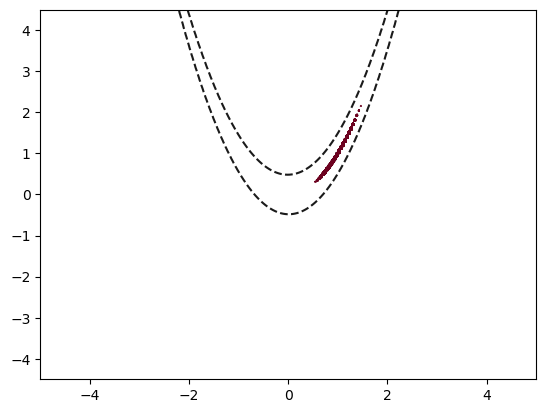

In [35]:
x0 = [-1.2, 1.0] 

xk_gr, k, flag, sec = descenso_max(fun_Rosenbrock, grad_fun_Rosenbrock, x0, Ng=50, tol2=eps**(1/4))

print("xk:", xk_gr)
print("k: ", k)
print("flag: ", flag) 
#print("sec", np.array(sec))   

#obtenemos el valor de la funcion para cada valor en la sucesion de puntos 
contornos = [fun_Rosenbrock(x)  for x in sec]
contornos.sort()

#Pasamos los parametros definidos por el problema y el arreglo ordenado de mayor a menor
plot2DFnc(fun_Rosenbrock, xl, xr, ybottom, ytop, contornos)

### 3  
La relajaci'on de la condicion de paro del algoritmo de la seccio'n dorada son convenientes cuando la funcio'n tiene un decrecimiento relevante. Al variar el tamaño de la tolerancia, la precisio'n del ca'lculo del tamaño de paso, se ve afectada ya que el algoritmo puede detenerse con cambios menos importantes. Si sabemos que la funcion cambia rapidamente o no se busca obtener mucha precision podemos optar por relajar los parametros de parada. 

El ser poco precisos en el tamaño de paso se ve reflejado en los resultados del algoritmo de ma'ximo descenso, pues puede ocasionar que el algoritmo no converga porque el tamaño de paso no permite alcanzar el punto o'ptimo.